In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#import data
df = pd.read_csv('dfFeatureEngineering.csv',index_col =0)

In [3]:
#list of questions and ideas

#does training the data on the log of sales price make a difference for KNN?

In [4]:
#filters for looking at data

objectFilter = ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'DataType',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Functional', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType']

intFilter = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold']

OrgFeatures = [objectFilter + intFilter]

FeatEnginer = list(df.columns[-9:])

intFilterAll = intFilter + FeatEnginer

In [5]:
type(intFilter)
print(intFilter)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


In [6]:
type(intFilterAll)

list

In [7]:
print(intFilterAll)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotFullBath', 'TotHalfBath', 'HouseAge', 'YrSinceRemod', 'TotSF', 'HasBasement', 'Has2Floor', 'HasGarage', 'HasPool']


In [8]:
dfTrain = df[df['DataType']== 1].copy() #.copy makes it explict that we want a copy, not a view of the orignal frame
dfTest = df[df['DataType']== 0].copy()

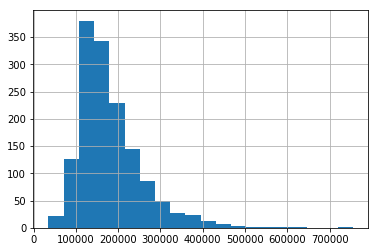

In [9]:
dfTrain.SalePrice.hist(bins = 20)

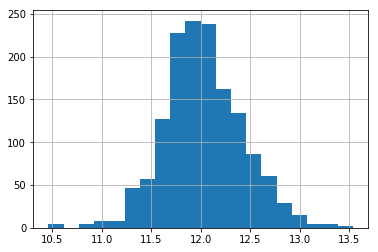

In [10]:
#Makes the price more uniform, but is that something we actually want?  
SalePriceLog = np.log(dfTrain.SalePrice)
SalePriceLog.hist(bins = 20)

In [11]:
print(dfTrain.shape)
print(dfTest.shape)

(1460, 78)
(1459, 78)


In [12]:
dfTrain['SalePriceLog'] = np.log(dfTrain.SalePrice)

In [13]:
dfTrain[['SalePrice','SalePriceLog']].head()

,SalePrice,SalePriceLog
0,208500.0,12.247694
1,181500.0,12.109011
2,223500.0,12.317167
3,140000.0,11.849398
4,250000.0,12.429216


In [14]:
#creates a data frame filled with correlations
corr = dfTrain[intFilterAll + ['SalePriceLog']].corr().copy()

In [15]:
#says what everthing is correlated with Sale Price

#but can do better by sorting values

corr[['SalePrice','SalePriceLog']].sort_values(by = 'SalePrice',ascending = False)
#going to creat a new column of this.  Idea that farther away from zero, the better

,SalePrice,SalePriceLog
SalePrice,1.000000,0.948374
SalePriceLog,0.948374,1.000000
OverallQual,0.790982,0.817184
TotSF,0.716883,0.710274
GrLivArea,0.708624,0.700927
GarageCars,0.640409,0.680625
GarageArea,0.623431,0.650888
TotalBsmtSF,0.613581,0.612134
1stFlrSF,0.605852,0.596981
TotFullBath,0.582934,0.615054


In [16]:
corr['SalesDiff'] = (corr['SalePriceLog'] - corr['SalePrice'])

In [17]:
corr['SalesDiff'].sort_values(ascending = False)
#Think this shows me that SalePrice Log is the better thing to try and aim for.  Would need to talk through the math with someone

HasGarage        0.086167
YearBuilt        0.063673
YearRemodAdd     0.058507
SalePriceLog     0.051626
OverallCond      0.040988
BedroomAbvGr     0.040831
GarageCars       0.040216
FullBath         0.034107
TotHalfBath      0.032157
TotFullBath      0.032120
HalfBath         0.029875
HasBasement      0.029230
GarageArea       0.027456
OverallQual      0.026203
Fireplaces       0.022521
BsmtFinSF2       0.016211
Has2Floor        0.012894
BsmtHalfBath     0.011695
MoSold           0.010897
MSSubClass       0.010325
3SsnPorch        0.010317
ScreenPorch      0.009761
WoodDeckSF       0.009722
BsmtFullBath     0.009102
BsmtUnfSF        0.007506
OpenPorchSF      0.005197
Id               0.003974
MiscVal          0.001169
TotRmsAbvGrd     0.000699
2ndFlrSF        -0.000034
TotalBsmtSF     -0.001447
LotArea         -0.006523
TotSF           -0.006609
GrLivArea       -0.007698
YrSold          -0.008340
1stFlrSF        -0.008871
KitchenAbvGr    -0.011641
LowQualFinSF    -0.012357
BsmtFinSF1  

In [18]:
topBot5 = ['OverallQua','TotSF','GrLivArea','GarageCars','GarageArea',
           'MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge']

topBot10 = ['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold',
            'OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge',
'OverallQual','TotSF','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','TotFullBath','FullBath','TotRmsAbvGrd']

In [30]:
#dfTrain[SalePriceLog].group_by(df['Neighborhood']).mean()
NeighborhoodMean = dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).mean()
NeighborhoodMedian = dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).median()
#dfTrain['SalePriceLog'].groupby(dfTrain['Neighborhood']).median()).sort_values(ascending = True)

#print(dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).mean())
#print(dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).median())

In [44]:
NeighboorHoodPriceExplo = pd.concat([NeighborhoodMean,NeighborhoodMedian], axis =1)
NeighboorHoodPriceExplo.columns = ['Mean','Median']

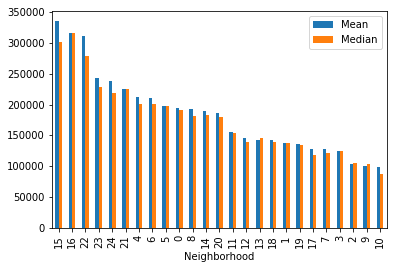

In [43]:
NeighboorHoodPriceExplo.sort_values(by = 'Mean',ascending = False).plot.bar()

In [ ]:
#For the above, looks like mean is usally larger than the median
#Makes sense as mean is pulled up by larger outliers

Neighborhood
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
17    AxesSubplot(0.125,0.125;0.775x0.755)
18    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
21    AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755

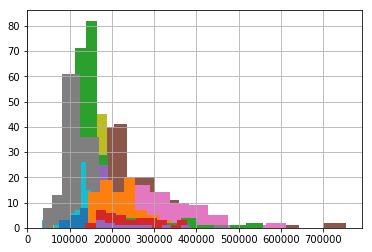

In [48]:
dfTrain['SalePrice'].groupby(dfTrain['Neighborhood']).hist()

In [ ]:
#Confirms that numbers have the potential to get pulled up.  So goign to try median

In [52]:
print(NeighborhoodMedian.sort_values(ascending = True))
print(NeighborhoodMedian.median())
#index 20 is the middle one

Neighborhood
10     88000.0
9     103000.0
2     106000.0
17    119000.0
7     121750.0
3     124300.0
19    135000.0
1     137500.0
18    139500.0
12    140000.0
13    146000.0
11    153500.0
20    179900.0
8     181000.0
14    182900.0
0     191000.0
5     197200.0
4     200250.0
6     200624.0
24    218000.0
21    225500.0
23    228475.0
22    278000.0
15    301500.0
16    315000.0
Name: SalePrice, dtype: float64
179900.0


In [53]:
index = (NeighborhoodMedian.index.values)
values = (NeighborhoodMedian.values)
values = (values/179900.0)*100

In [54]:
#convert values into a list
values = list(values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 106.1700945    76.43135075   58.92162312   69.09394108  111.31183991
  109.61645359  111.51973319   67.67648694  100.61145081   57.25403002
   48.91606448   85.32518066   77.82101167   81.15619789  101.66759311
  167.59310728  175.09727626   66.14785992   77.54307949   75.04168983
  100.          125.34741523  154.53029461  127.00111173  121.17843246]


In [56]:
NeighborghZip = zip(index,values)

In [57]:
NeighborhoodMapping = dict(NeighborghZip)

In [58]:
print(NeighborhoodMapping)

{0: 106.17009449694275, 1: 76.431350750416897, 2: 58.921623123957758, 3: 69.093941078376872, 4: 111.31183991106171, 5: 109.61645358532519, 6: 111.51973318510284, 7: 67.676486937187335, 8: 100.61145080600333, 9: 57.254030016675927, 10: 48.916064480266812, 11: 85.325180655919951, 12: 77.821011673151759, 13: 81.156197887715393, 14: 101.66759310728182, 15: 167.59310728182325, 16: 175.09727626459144, 17: 66.147859922178981, 18: 77.543079488604789, 19: 75.041689827682049, 20: 100.0, 21: 125.34741523068371, 22: 154.53029460811564, 23: 127.00111172873818, 24: 121.17843246247915}


In [68]:
dfTrain['NewNeighborhood']=dfTrain['Neighborhood'].map(NeighborhoodMapping)
dfTest['NewNeighborhood']=dfTest['Neighborhood'].map(NeighborhoodMapping)

In [66]:
dfTrain[['NewNeighborhood','SalePriceLog']].corr()

,NewNeighborhood,SalePriceLog
NewNeighborhood,1.000000,0.738394
SalePriceLog,0.738394,1.000000


In [69]:
dfTrain.to_csv('FinalTrain.csv')
dfTest.to_csv('FinalTest.csv')